✅ Loaded 196 rows


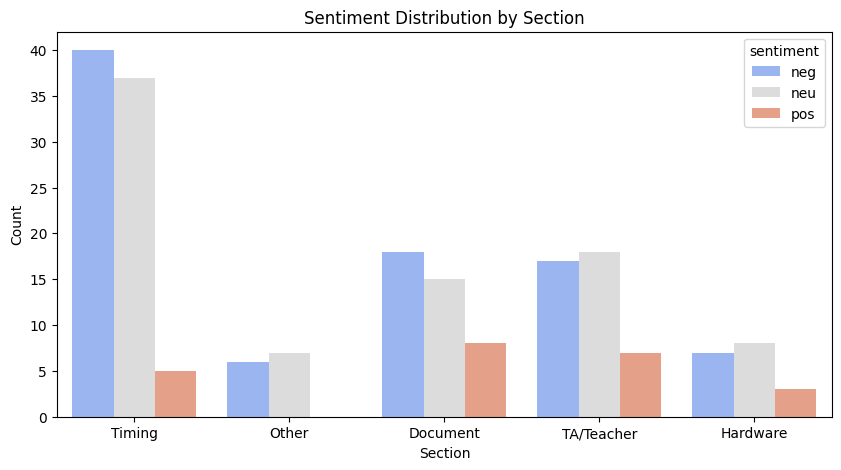

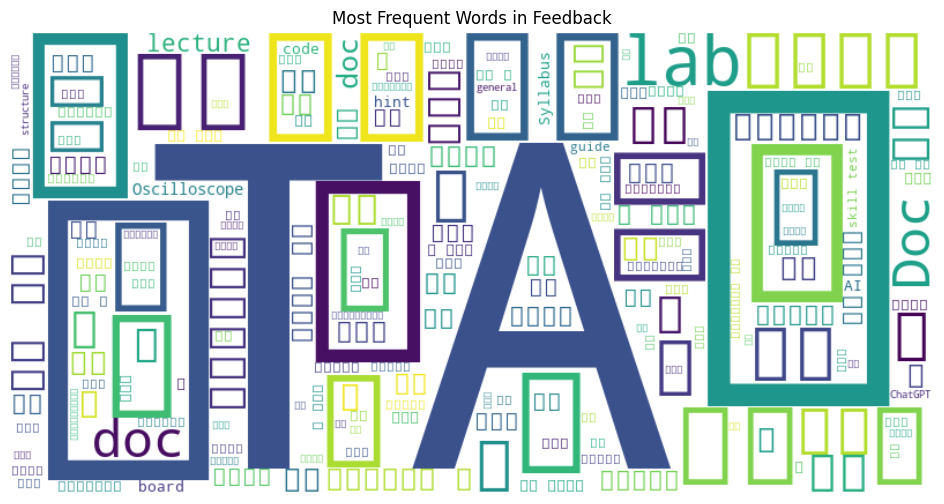

✅ Exported sentiment data to ../data/processed/feedback_sentiment.csv


In [1]:
# =========================
# STEP 1: Import libraries
# =========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os
from wordcloud import WordCloud

# =========================
# STEP 2: Load data
# =========================

load_dotenv()

DB_USER = os.getenv("POSTGRES_USER", "postgres")
DB_PASS = os.getenv("POSTGRES_PASSWORD", "postgres123")
DB_NAME = os.getenv("POSTGRES_DB", "feedbackdb")
DB_PORT = os.getenv("POSTGRES_PORT", "5433")
DB_HOST = os.getenv("POSTGRES_HOST", "localhost")

engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

df = pd.read_sql_query("SELECT section, category, comment FROM feedback;", engine)
print(f"✅ Loaded {len(df)} rows")

# =========================
# STEP 3: Sentiment (rule-based)
# =========================

positive_keywords = ["เข้าใจ", "เยี่ยม", "โอเค", "ชอบ", "สุดยอด", "ขอบคุณ", "เยอะ", "เร็ว", "ตรงเวลา", "คุ้มค่า"]
negative_keywords = ["ไม่เข้าใจ", "แย่", "ไม่ดี","ไม่มี", "ลำบาก", "หงุดหงิด", "ไม่เข้าใจ", "น้อย", "ช้า", "เสียเวลา", "ยาก", "งง"]

def simple_sentiment(text):
    if not isinstance(text, str):
        return "neu"
    pos = sum(word in text for word in positive_keywords)
    neg = sum(word in text for word in negative_keywords)
    if pos > neg:
        return "pos"
    elif neg > pos:
        return "neg"
    return "neu"

df["sentiment"] = df["comment"].apply(simple_sentiment)

mapping = {"pos": 1, "neu": 0, "neg": -1}
df["sentiment_score"] = df["sentiment"].map(mapping)

# =========================
# STEP 4: Visualize Sentiment by Section
# =========================

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="section", hue="sentiment", palette="coolwarm")
plt.title("Sentiment Distribution by Section")
plt.xlabel("Section")
plt.ylabel("Count")
plt.show()

# =========================
# STEP 5: Word Cloud (optional)
# =========================

text = " ".join(df["comment"].dropna())
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Feedback")
plt.show()

# =========================
# STEP 6: Export for Day 5 Dashboard
# =========================

out_path = "../data/processed/feedback_sentiment.csv"
df.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"✅ Exported sentiment data to {out_path}")
